# **Decision tree**

# **Importing Libraries**

In [10]:
!pip install pydotplus
!pip install graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score



# **Reading Data**

In [11]:
df = pd.read_csv(r"C:\Users\ambat\Downloads\Dry_Bean_Dataset.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [2]:
df.shape

(13611, 17)

# **Exploring Data**

In [3]:
X = df.drop('Class', axis='columns')
y = df['Class']
print(X.shape)
print(y.shape)

(13611, 16)
(13611,)


In [4]:
X = pd.get_dummies(X)
print(X.columns)
feature_names = X.columns
X.head()
X.shape

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


(13611, 16)

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, random_state=2)

In [6]:
for d in range(2,12):
    tree = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    print("Depth: ", d, "Accuracy:", scores.mean())

Depth:  2 Accuracy: 0.6481197162382711
Depth:  3 Accuracy: 0.7807589373763414
Depth:  4 Accuracy: 0.8263110159458812
Depth:  5 Accuracy: 0.8781336663049982
Depth:  6 Accuracy: 0.8966502564230533
Depth:  7 Accuracy: 0.8991975472452338
Depth:  8 Accuracy: 0.9020375639258088
Depth:  9 Accuracy: 0.901646271032473
Depth:  10 Accuracy: 0.9006662152609988
Depth:  11 Accuracy: 0.8990985483196816


In [13]:
tree = DecisionTreeClassifier(max_depth=4)
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_hat = tree.predict(X_test)
print("Test Accuracy: ", tree.score(X_test, y_test))

Test Accuracy:  0.8307375844842786


# **Confusion Matrix**

In [8]:
import numpy as np
cm = confusion_matrix(y_test, y_hat)
print("CM", cm)
for i in range(cm.shape[0]):
    tn, fp, fn, tp = cm[i, i], np.sum(cm[i, :]) - cm[i, i], np.sum(cm[:, i]) - cm[i, i], cm[i, i]
    print(f"Class {i}: TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}")

CM [[  0   0 313   0   0   0  17]
 [  0 126   4   0   0   0   0]
 [  0   0 398   0   8   0   2]
 [  0   0   0 807   0  16  64]
 [  0   0  26   4 433   0  19]
 [  0   0   1  16   0 474  16]
 [  0   0   3  56   0  11 589]]
Class 0: TN = 0, FP = 330, FN = 0, TP = 0
Class 1: TN = 126, FP = 4, FN = 0, TP = 126
Class 2: TN = 398, FP = 10, FN = 347, TP = 398
Class 3: TN = 807, FP = 80, FN = 76, TP = 807
Class 4: TN = 433, FP = 49, FN = 8, TP = 433
Class 5: TN = 474, FP = 33, FN = 27, TP = 474
Class 6: TN = 589, FP = 70, FN = 118, TP = 589


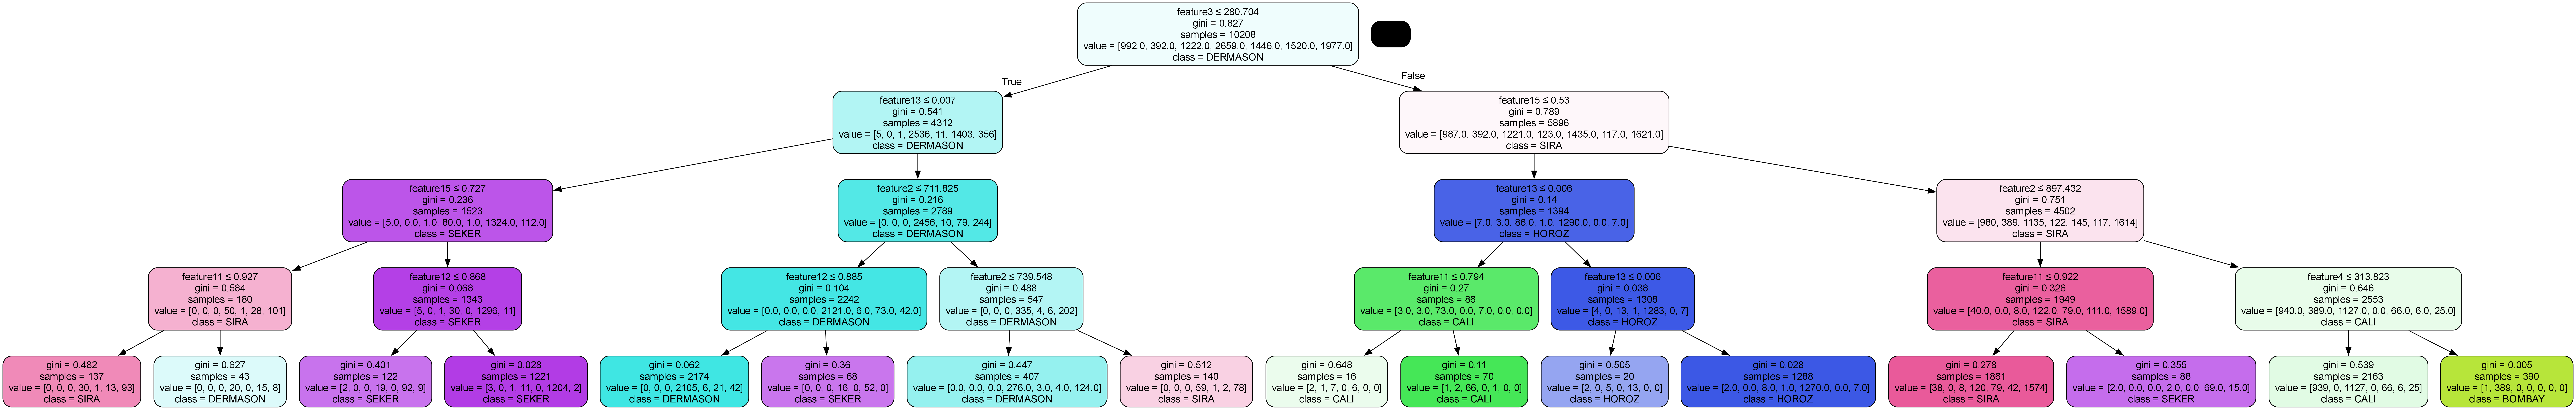

In [9]:
!pip install pydotplus
!pip install graphviz
class_names = tree.classes_.tolist()
feature_names = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16'] 
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, class_names=class_names, feature_names=feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_dpi(300)
graph.set_size('"50,50!"')
graph.write_png(r"C:\Users\ambat\Downloads\Dry_Bean_Dataset.png")
Image(graph.create_png())